In [1]:
import torch
from torch import nn,optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE = 64
LR = 0.01
EPOCH_NUM = 10

In [3]:
train_data = datasets.MNIST(root='./mnist/',train=True,transform=transforms.ToTensor())
test_data = datasets.MNIST(root='./mnist/',train=False,transform=transforms.ToTensor())
train_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_x = Variable(test_data.test_data,volatile=True).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels.numpy().squeeze()[:2000]

C:\Users\Eleanor\Anaconda3\envs\py35\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Eleanor\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  after removing the cwd from sys.path.
C:\Users\Eleanor\Anaconda3\envs\py35\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


C:\Users\Eleanor\Anaconda3\envs\py35\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\Users\Eleanor\Anaconda3\envs\py35\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000, 28, 28])
torch.Size([60000])


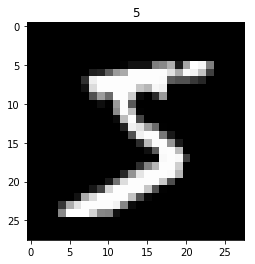

In [4]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title('%i'%train_data.train_labels[0])
plt.show()

In [5]:
class RNN(nn.Module):
    def __init__(self,in_dim,hidden_dim,n_layer,n_class):
        super(RNN,self).__init__()
        self.n_layer = n_layer
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(in_dim,hidden_dim,n_layer,batch_first=True)
        self.out = nn.Linear(hidden_dim,n_class)
    def forward(self,x):
        out,_ = self.lstm(x)
        out = out[:,-1,:]
        out = self.out(out)
        return out

In [6]:
model = RNN(28,64,1,10)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)  

In [8]:
for epoch in range(EPOCH_NUM):
    for step,(x,y) in enumerate(train_loader):
        b_x = Variable(x.view(-1,28,28))
        b_y = Variable(y)
        
        output = model(b_x)
        loss = loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 1000 == 0:   
            test_output = model(test_x)
            pred_y = torch.max(test_output,1)[1].data.numpy().squeeze()
            acc = sum(pred_y==test_y)/float(test_y.size)
            print('Epoch',epoch,'|train loss:%.4f'%loss.item(),'|test acc:%.2f'%acc)

Epoch 0 |train loss:0.0238 |test acc:0.97
Epoch 1 |train loss:0.0451 |test acc:0.97
Epoch 2 |train loss:0.1290 |test acc:0.98
Epoch 3 |train loss:0.0357 |test acc:0.97
Epoch 4 |train loss:0.0560 |test acc:0.97
Epoch 5 |train loss:0.0398 |test acc:0.97
Epoch 6 |train loss:0.1980 |test acc:0.97
Epoch 7 |train loss:0.0276 |test acc:0.97
Epoch 8 |train loss:0.0332 |test acc:0.98
Epoch 9 |train loss:0.2025 |test acc:0.98
